The code comes from this URL:

https://davebackus.gitbooks.io/test/content/graphs1.html


In [5]:
%matplotlib inline

import sys
import pandas as pd                    # data package
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt                  # date and time module

# check versions (overkill, but why not?)
print('Python version:', sys.version)
print('Pandas version: ', pd.__version__)
print('Matplotlib version: ', mpl.__version__)
print('Today: ', dt.date.today())


Python version: 3.4.3 (default, Oct 14 2015, 20:28:29) 
[GCC 4.8.4]
Pandas version:  0.18.1
Matplotlib version:  1.5.2
Today:  2016-08-27


In [6]:
gdp  = [13271.1, 13773.5, 14234.2, 14613.8, 14873.7, 14830.4, 14418.7,
        14783.8, 15020.6, 15369.2, 15710.3]
pce  = [8867.6, 9208.2, 9531.8, 9821.7, 10041.6, 10007.2, 9847.0, 10036.3,
        10263.5, 10449.7, 10699.7]
year = list(range(2003,2014))        # use range for years 2003-2013

us = pd.DataFrame({'gdp': gdp, 'pce': pce}, index=year)
print(us)

          gdp      pce
2003  13271.1   8867.6
2004  13773.5   9208.2
2005  14234.2   9531.8
2006  14613.8   9821.7
2007  14873.7  10041.6
2008  14830.4  10007.2
2009  14418.7   9847.0
2010  14783.8  10036.3
2011  15020.6  10263.5
2012  15369.2  10449.7
2013  15710.3  10699.7


In [7]:
code    = ['USA', 'FRA', 'JPN', 'CHN', 'IND', 'BRA', 'MEX']
country = ['United States', 'France', 'Japan', 'China', 'India',
             'Brazil', 'Mexico']
gdppc   = [53.1, 36.9, 36.3, 11.9, 5.4, 15.0, 16.5]

wbdf = pd.DataFrame({'gdppc': gdppc, 'country': country}, index=code)
wbdf

,country,gdppc
USA,United States,53.1
FRA,France,36.9
JPN,Japan,36.3
CHN,China,11.9
IND,India,5.4
BRA,Brazil,15.0
MEX,Mexico,16.5


In [8]:
import pandas.io.data as web
ff = web.DataReader('F-F_Research_Data_factors', 'famafrench')[1]
ff.columns = ['xsm', 'smb', 'hml', 'rf']
ff['rm'] = ff['xsm'] + ff['rf']
ff = ff[['rm', 'rf']]               # extract rm (market) and rf (riskfree)
ff.head(5)

/venv35/lib/python3.4/site-packages/pandas/io/data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


,rm,rf
1927,32.59,3.12
1928,38.95,3.56
1929,-14.79,4.75
1930,-28.82,2.41
1931,-44.04,1.07


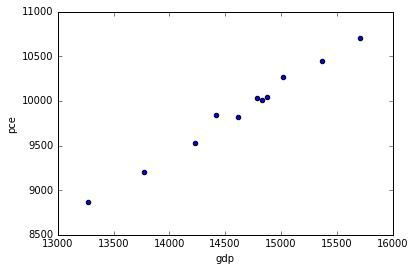

In [9]:
us.plot.scatter('gdp', 'pce')

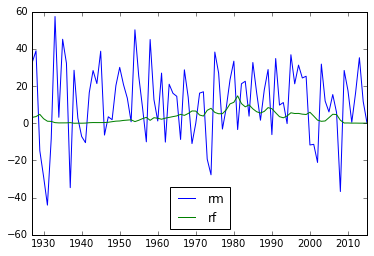

In [10]:
ff.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdd08bc8438>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fdd08b3e0f0>], dtype=object)

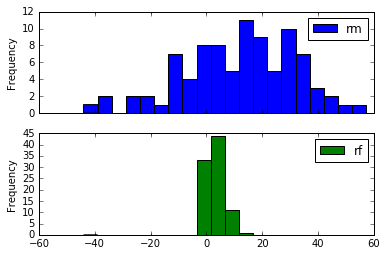

In [11]:
ff.plot(kind='hist',         # histogram 
        bins=20,             # 20 bins
        subplots=True)       # two separate subplots

In [12]:
import matplotlib.pyplot as plt

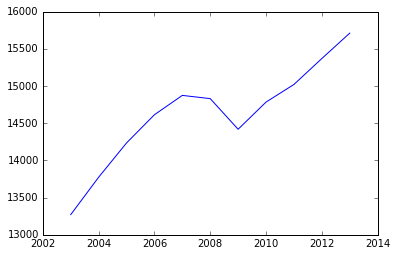

In [13]:
plt.plot(us.index, us['gdp'])

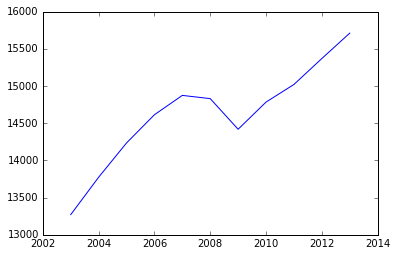

In [15]:
plt.plot(us.index, us['gdp'])

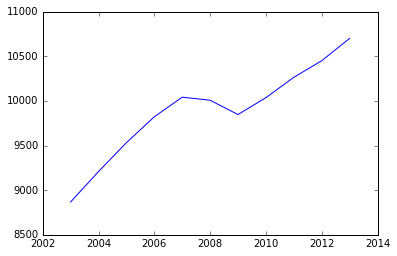

In [16]:
plt.plot(us.index, us['pce'])

<Container object of 11 artists>

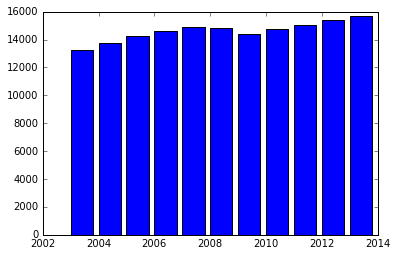

In [17]:
plt.bar(us.index, us['gdp'])

<Container object of 11 artists>

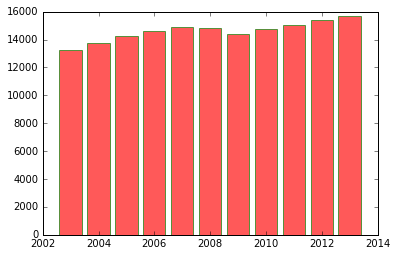

In [18]:
plt.bar(us.index, us['gdp'],
        align='center',
        alpha=0.65,
        color='red',
        edgecolor='green')

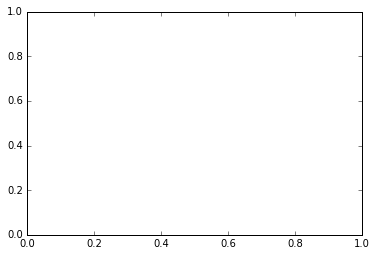

In [19]:
import matplotlib.pyplot as plt  # import pyplot module 
fig, ax = plt.subplots()         # create fig and ax objects

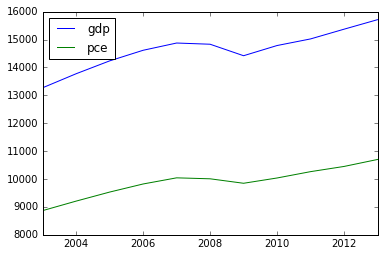

In [20]:
fig, axe = plt.subplots()        # create axis object axe 
us.plot(ax=axe)                  # ax= looks for axis object, axe is it

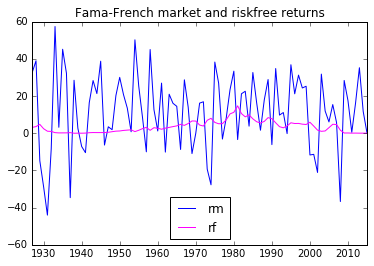

In [21]:
fig, ax = plt.subplots()
ff.plot(ax=ax, 
        kind='line',                 # line plot 
        color=['blue', 'magenta'],   # line color 
        title='Fama-French market and riskfree returns')

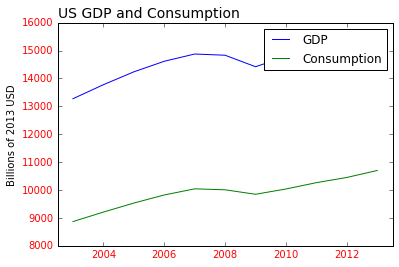

In [22]:
fig, ax = plt.subplots()

us.plot(ax=ax)       
ax.set_title('US GDP and Consumption', fontsize=14, loc='left')
ax.set_ylabel('Billions of 2013 USD')
ax.legend(['GDP', 'Consumption'])           # more descriptive variable names 
ax.set_xlim(2002.5, 2013.5)                 # shrink x axis limits
ax.tick_params(labelcolor='red')            # change tick labels to red

Object ax has dimension 2


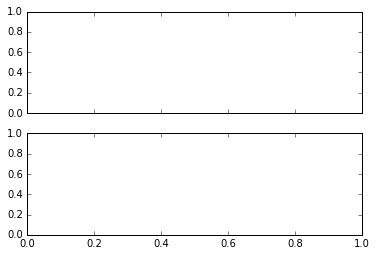

In [23]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True)  
print('Object ax has dimension', len(ax))

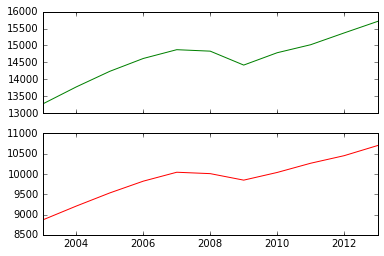

In [24]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True)

us['gdp'].plot(ax=ax[0], color='green')   # first plot
us['pce'].plot(ax=ax[1], color='red')     # second plot

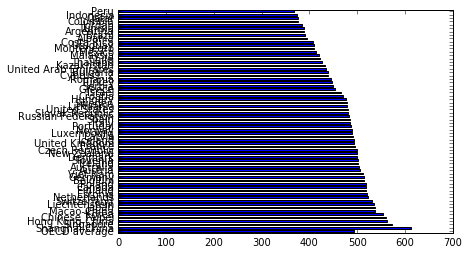

In [25]:
import pandas as pd
import matplotlib.pyplot as plt 

url = 'http://dx.doi.org/10.1787/888932937035'
pisa = pd.read_excel(url,
                     skiprows=18,      # skip the first 18 rows
                     skipfooter=7,     # skip the last 7
                     parse_cols=[0,1,9,13], # select columns of interest
                     index_col=0,      # set the index as the first column
                     header=[0,1]      # set the variable names
                     )
pisa = pisa.dropna()                   # drop blank lines
pisa.columns = ['Math', 'Reading', 'Science'] # simplify variable names

fig, ax = plt.subplots()
pisa['Math'].plot(kind='barh', ax=ax)  # create bar chart

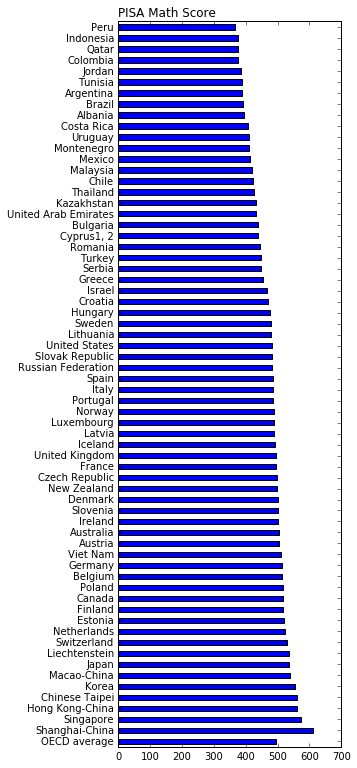

In [30]:
import pandas as pd
import matplotlib.pyplot as plt 

url = 'http://dx.doi.org/10.1787/888932937035'
pisa = pd.read_excel(url,
                     skiprows=18,      # skip the first 18 rows
                     skipfooter=7,     # skip the last 7
                     parse_cols=[0,1,9,13], # select columns of interest
                     index_col=0,      # set the index as the first column
                     header=[0,1]      # set the variable names
                     )
pisa = pisa.dropna()                   # drop blank lines
pisa.columns = ['Math', 'Reading', 'Science'] # simplify variable names

fig, ax = plt.subplots()
pisa['Math'].plot(kind='barh', ax=ax, figsize=(4,13))  
ax.set_title('PISA Math Score', loc='left')

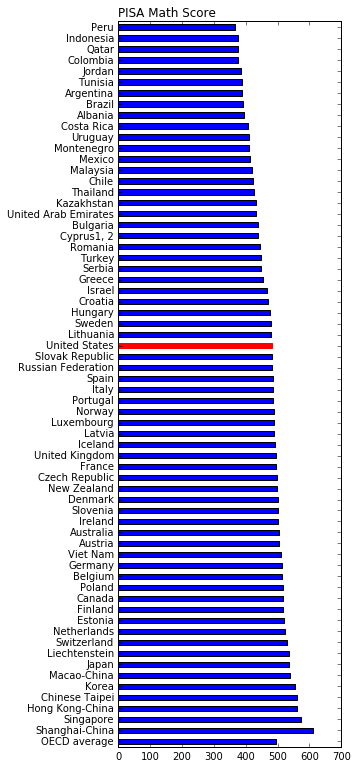

In [31]:
import pandas as pd
import matplotlib.pyplot as plt 

url = 'http://dx.doi.org/10.1787/888932937035'
pisa = pd.read_excel(url,
                     skiprows=18,      # skip the first 18 rows
                     skipfooter=7,     # skip the last 7
                     parse_cols=[0,1,9,13], # select columns of interest
                     index_col=0,      # set the index as the first column
                     header=[0,1]      # set the variable names
                     )
pisa = pisa.dropna()                   # drop blank lines
pisa.columns = ['Math', 'Reading', 'Science'] # simplify variable names

fig, ax = plt.subplots()
pisa['Math'].plot(ax=ax, kind='barh', figsize=(4,13))
ax.set_title('PISA Math Score', loc='left')
ax.get_children()[36].set_color('r')

In [32]:
 # load packages (redundancy is ok)
import pandas as pd                   # data management tools
from pandas.io import wb              # World Bank api
import matplotlib.pyplot as plt       # plotting tools

# variable list (GDP, GDP per capita, life expectancy)
var = ['NY.GDP.PCAP.PP.KD', 'NY.GDP.MKTP.PP.KD', 'SP.DYN.LE00.IN']  
# country list (ISO codes)
iso = ['USA', 'FRA', 'JPN', 'CHN', 'IND', 'BRA', 'MEX']
year = 2013

# get data from World Bank
df = wb.download(indicator=var, country=iso, start=year, end=year)

# munge data
df = df.reset_index(level='year', drop=True)
df.columns = ['gdppc', 'gdp', 'life'] # rename variables
df['pop']  = df['gdp']/df['gdppc']    # population
df['gdp'] = df['gdp']/10**12          # convert to trillions
df['gdppc'] = df['gdppc']/10**3       # convert to thousands
df['order'] = [5, 3, 1, 4, 2, 6, 0]   # reorder countries
df = df.sort_values(by='order', ascending=False)
df

/venv35/lib/python3.4/site-packages/pandas/io/wb.py:21: FutureWarning: 
The pandas.io.wb module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


,gdppc,gdp,life,pop,order
country,,,,,
Mexico,16.154744,1.998990,76.532659,1.237401e+08,6
Brazil,15.281612,3.121413,74.122439,2.042594e+08,5
India,5.089581,6.512113,67.660415,1.279499e+09,4
China,11.805087,16.023988,75.585146,1.357380e+09,3
Japan,35.540536,4.525683,83.331951,1.273386e+08,2
France,37.250212,2.457475,82.219512,6.597210e+07,1
United States,50.878444,16.099334,78.841463,3.164274e+08,0


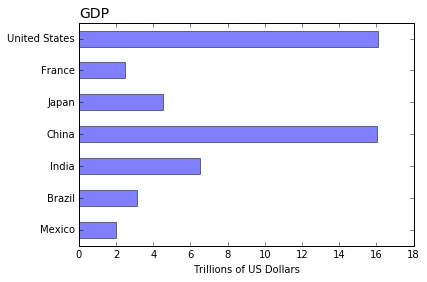

In [33]:
fig, ax = plt.subplots()
df['gdp'].plot(ax=ax, kind='barh', alpha=0.5)
ax.set_title('GDP', loc='left', fontsize=14)
ax.set_xlabel('Trillions of US Dollars')
ax.set_ylabel('')

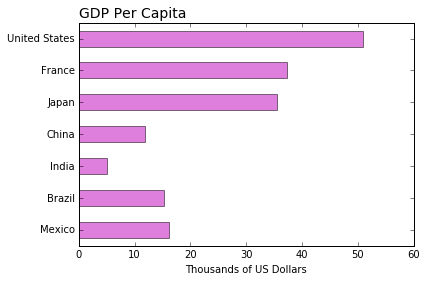

In [34]:
fig, ax = plt.subplots()
df['gdppc'].plot(ax=ax, kind='barh', color='m', alpha=0.5)
ax.set_title('GDP Per Capita', loc='left', fontsize=14)
ax.set_xlabel('Thousands of US Dollars')
ax.set_ylabel('')

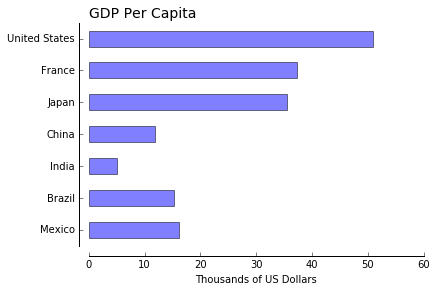

In [35]:
fig, ax = plt.subplots()
df['gdppc'].plot(ax=ax, kind='barh', color='b', alpha=0.5)
ax.set_title('GDP Per Capita', loc='left', fontsize=14)
ax.set_xlabel('Thousands of US Dollars')
ax.set_ylabel('')

# Tufte-like axes
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

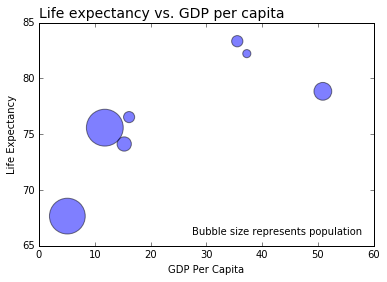

In [36]:
fig, ax = plt.subplots()
ax.scatter(df['gdppc'], df['life'],     # x,y variables
            s=df['pop']/10**6,          # size of bubbles
            alpha=0.5)   
ax.set_title('Life expectancy vs. GDP per capita', loc='left', fontsize=14)
ax.set_xlabel('GDP Per Capita')
ax.set_ylabel('Life Expectancy')
ax.text(58, 66, 'Bubble size represents population', horizontalalignment='right')

In [41]:
mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline

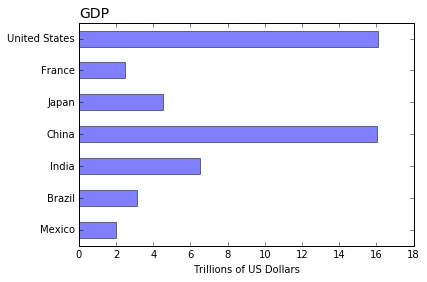

In [42]:
fig, ax = plt.subplots()
df['gdp'].plot(ax=ax, kind='barh', alpha=0.5)
ax.set_title('GDP', loc='left', fontsize=14)
ax.set_xlabel('Trillions of US Dollars')
ax.set_ylabel('')

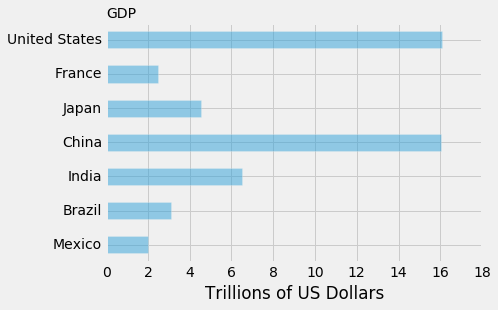

In [43]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()
df['gdp'].plot(ax=ax, kind='barh', alpha=0.5)
ax.set_title('GDP', loc='left', fontsize=14)
ax.set_xlabel('Trillions of US Dollars')
ax.set_ylabel('')

/venv35/lib/python3.4/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


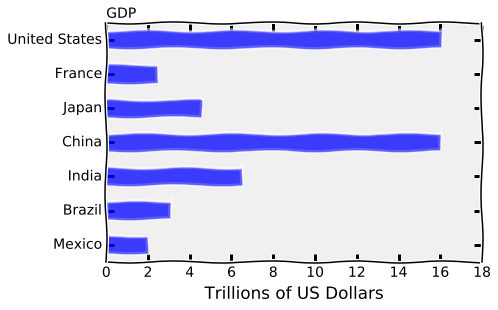

In [44]:
plt.xkcd()
fig, ax = plt.subplots()
df['gdp'].plot(ax=ax, kind='barh', alpha=0.5)
ax.set_title('GDP', loc='left', fontsize=14)
ax.set_xlabel('Trillions of US Dollars')
ax.set_ylabel('')

In [47]:
!jupyter nbconvert matplotlib.ipynb --to html

Traceback (most recent call last):
  File "app_main.py", line 72, in run_toplevel
  File "/usr/local/bin/jupyter", line 7, in <module>
    from jupyter_core.command import main
ImportError: No module named jupyter_core
